## Dataset:
The file 2 data.mat contains two sequences x = {x1,x2,...,x100|0 <= xi <= 2} and t = {t1,t2,...,t100} which represent the input sequence and the corresponding target sequence, respectively.
## Basis Function:
Please apply the sigmoidal basis functions ϕ = [ ϕ_0,..., ϕ_M-1]^T of the form  ϕj(x) =  σ(x-μj)/s
where σ(a) is the logistic sigmoid function defined in (3.6). In this exercise, please take the following parameter settings for your basis functions: M = 7, s = 0.1 and μj = 2j/M with j = 0, 1, . . . , (M-1). In order to discuss how the amount of training data affects the regression process, please take the data size to be N=10, 15, 30 and 80, for each of the following questions:

In [1]:
## import lib
import pandas as pd
import numpy as np
from numpy.linalg import pinv,inv,matrix_power
from scipy.linalg import sqrtm
from scipy.io import loadmat
import itertools
import math


In [2]:
## load data
data_dir = './Data/'
x = loadmat(data_dir+'2_data.mat')['x']
t = loadmat(data_dir+'2_data.mat')['t']
print('x-type : %s %s' % (type(x), type(x[0][0])))
print('x-shape : ',x.shape)
print('t-type : %s %s' % (type(t), type(t[0][0])))
print('t-shape : ',t.shape)
# print(x[:3])

x-type : <class 'numpy.ndarray'> <class 'numpy.float64'>
x-shape :  (100, 1)
t-type : <class 'numpy.ndarray'> <class 'numpy.float64'>
t-shape :  (100, 1)


## 2-1 Compute M<sub>N</sub>, S<sub>N</sub> 
for the posterior distribution p(w|t) = N (w|m<sub>N</sub> , S<sub>N</sub> ), 

given prior p(w|α) = N(w| 0, 10<sup>-6</sup> __I__ )

In [3]:
# from formula
# m_N = β * S_N * Φ^T * t
# S_N ^ -1 = α * I + β * Φ^T * Φ
# which 
# β = 1, α = 10e-6
# Φ = [ϕ0, ϕ1 ,,,, ϕM-1]^T
# t = {t1,t2,...,tN}

#[note]: the basis function(ϕj) is compose of logistic sigmoid function 

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

M = 7
s = 0.1
beta = 1
alpha = 10e-6
Ns = [10,15,30,80]
mN_ary = np.zeros((len(Ns),M))
SN_ary = np.zeros((len(Ns),M,M))
Phi_ary = []
for idx, N in enumerate(Ns):
    xx = x[:N] # shape: (N,1)
    tt = t[:N] # shape: (N,1)
    
    ## first compute Φ matrix
    Phi_T = np.zeros((M,N))
    for j in range(M):
        a_ary = (xx.reshape(1,-1)[0] - (2*j/M))/s # a = x-uj/s
        phi_j = [sigmoid(a) for a in a_ary]
        Phi_T[j] = phi_j

    Phi = Phi_T.T
    Phi_ary.append(Phi)
    
    ## calculate m_N, S_N
    identity_mat = alpha*np.identity(M)
    phi_square = beta*np.dot(Phi_T,Phi)
    SN_inverse = identity_mat + phi_square
    SN = inv(SN_inverse)
    mN = np.dot( np.dot( beta*SN, Phi_T), tt)
    print('N = ',N)
    print('mN vector = ', mN.reshape(1,-1)[0])
    print('SN matrix = ', SN)
    
    mN_ary[idx] = mN.reshape(1,-1)
    SN_ary[idx] = SN
    print('===================================================')
    

N =  10
mN vector =  [  0.65587445   6.57904796   4.45731955  -5.17735394   0.29303916
  -2.70101391 -12.93570446]
SN matrix =  [[  11.6489694   -44.71194792   56.94566539  -52.71843182   47.29868438
   -22.84211683    4.93208166]
 [ -44.71194792  184.34666367 -241.19338083  224.34705527 -201.41416634
    97.2749989   -21.00383947]
 [  56.94566539 -241.19338083  323.89098051 -310.62078537  280.56509804
  -135.58401138   29.27894122]
 [ -52.71843182  224.34705527 -310.62078537  315.36244248 -290.10730097
   140.76166855  -30.44085869]
 [  47.29868438 -201.41416634  280.56509804 -290.10730097  273.56326983
  -136.58954908   30.11660113]
 [ -22.84211683   97.2749989  -135.58401138  140.76166855 -136.58954908
    74.111637    -19.79236571]
 [   4.93208166  -21.00383947   29.27894122  -30.44085869   30.11660113
   -19.79236571    9.04626752]]
N =  15
mN vector =  [ -1.29493577  14.93016422  -7.77345652   8.30878791 -12.02156689
   2.83419504 -13.78943   ]
SN matrix =  [[  3.90692674 -11.794

## 2-2 Generate five curve samples from the parameter posterior distribution
i.e. sample from p(w|t)

In [4]:
print(np.linspace(0, 2, 100).reshape(1,-1) )

[[ 0.          0.02020202  0.04040404  0.06060606  0.08080808  0.1010101
   0.12121212  0.14141414  0.16161616  0.18181818  0.2020202   0.22222222
   0.24242424  0.26262626  0.28282828  0.3030303   0.32323232  0.34343434
   0.36363636  0.38383838  0.4040404   0.42424242  0.44444444  0.46464646
   0.48484848  0.50505051  0.52525253  0.54545455  0.56565657  0.58585859
   0.60606061  0.62626263  0.64646465  0.66666667  0.68686869  0.70707071
   0.72727273  0.74747475  0.76767677  0.78787879  0.80808081  0.82828283
   0.84848485  0.86868687  0.88888889  0.90909091  0.92929293  0.94949495
   0.96969697  0.98989899  1.01010101  1.03030303  1.05050505  1.07070707
   1.09090909  1.11111111  1.13131313  1.15151515  1.17171717  1.19191919
   1.21212121  1.23232323  1.25252525  1.27272727  1.29292929  1.31313131
   1.33333333  1.35353535  1.37373737  1.39393939  1.41414141  1.43434343
   1.45454545  1.47474747  1.49494949  1.51515152  1.53535354  1.55555556
   1.57575758  1.5959596   1.61616162  

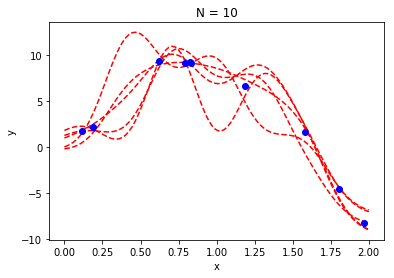

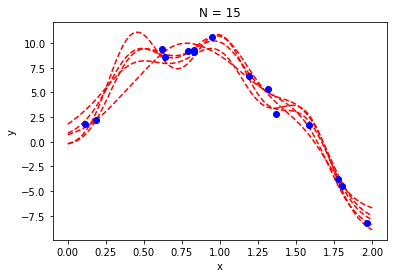

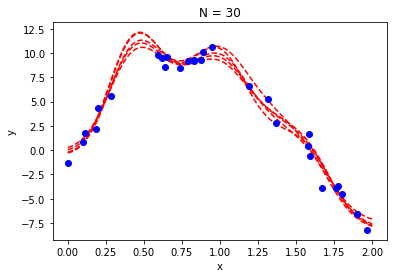

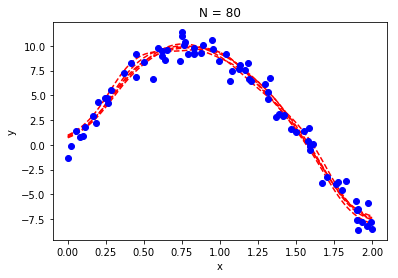

In [5]:
import matplotlib.pyplot as plt

sample_N = 5
for idx, N in enumerate(Ns):
    mean, cov = mN_ary[idx], SN_ary[idx]
    w_ary = np.random.multivariate_normal(mean, cov, sample_N) # sample from p(w|t)
#     PHI = Phi_ary[idx]
    
    plt.figure(idx)
    data = x[:N]
    for i in range(sample_N):
        xx = np.linspace(0, 2, 100)
        Phi_T = np.zeros((M,100))
        for j in range(M):
            a_ary = (xx.reshape(1,-1)[0] - (2*j/M))/s # a = x-uj/s
            phi_j = [sigmoid(a) for a in a_ary]
            Phi_T[j] = phi_j

        Phi = Phi_T.T
        y_func = np.dot(Phi,w_ary[i])
        
#         # sort y base on x
#         y_sort_func = [x for _,x in sorted(zip(xx,y_func))]
        plt.plot(xx, y_func, 'r--')#,x[:N].reshape(1,-1)[0], t[:N], 'bs')
        
    # plot true target value
    target = [x for _,x in sorted(zip(data,t[:N]))]
    plt.plot(sorted(data), target, 'bo')
    plt.title('N = %s'%str(N))
    plt.xlabel('x')
    plt.ylabel('y')
    
    # save fig
    # plt.savefig('2_2_N_%s.png'%str(N))
plt.show()

## 2-3 plot the predictive distribution of target value t
plot p(t| __x__, __t__, α, β) = N(t | m<sub>N</sub><sup>T</sup>*ϕ(x), σ<sub>N</sub><sup>2</sup>(x) ) , which σ<sub>N</sub><sup>2</sup>(x) = 1/β + ϕ(x)<sup>T</sup> * S<sub>N</sub>*ϕ(x)

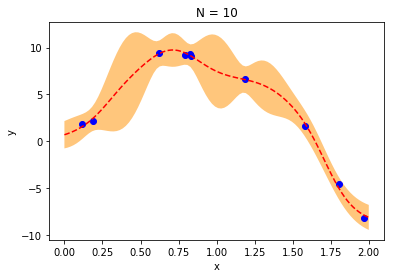

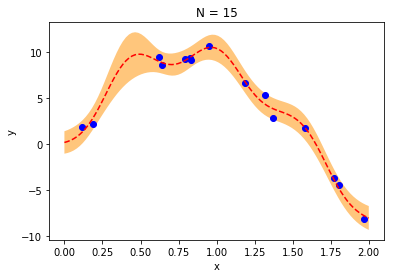

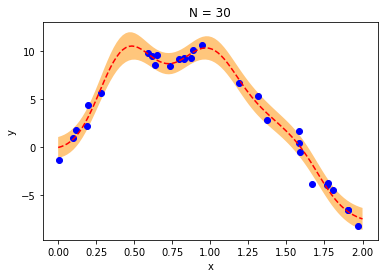

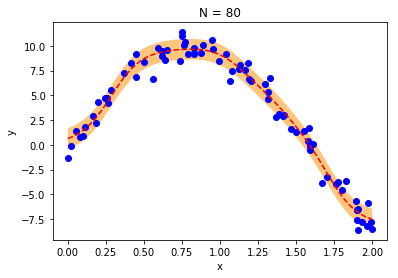

In [6]:
for idx, N in enumerate(Ns):
    mean, cov = mN_ary[idx], SN_ary[idx]
#     PHI = Phi_ary[idx] # N*M
    data = x[:N]
    
    plt.figure(idx)
    
    # plot target value t given from data
    target = [x for _,x in sorted(zip(data,t[:N]))]
    plt.plot(sorted(data), target, 'bo')
    
    # plot mean curve
    mean_ary = []
    for nn in range(100):
        xx = np.linspace(0, 2, 100)
        Phi_T = np.zeros((M,100))
        for j in range(M):
            a_ary = (xx.reshape(1,-1)[0] - (2*j/M))/s # a = x-uj/s
            phi_j = [sigmoid(a) for a in a_ary]
            Phi_T[j] = phi_j

        Phi = Phi_T.T
        mean_ary.append(np.dot(mean.T,Phi[nn].T))
    plt.plot(xx, mean_ary, 'r--')#,x[:N].reshape(1,-1)[0], t[:N], 'bs')
    
    # plot variance region
    variance = []
    for nn in range(100):
        xx = np.linspace(0, 2, 100)
        Phi_T = np.zeros((M,100))
        for j in range(M):
            a_ary = (xx.reshape(1,-1)[0] - (2*j/M))/s # a = x-uj/s
            phi_j = [sigmoid(a) for a in a_ary]
            Phi_T[j] = phi_j

        Phi = Phi_T.T
        variance.append(1.0/beta + np.dot( np.dot(Phi[nn],cov), Phi[nn].T))
    sd = np.sqrt(variance)
    plt.fill_between(xx, mean_ary-sd, mean_ary+sd, facecolor='#ffc67c')
    
    # plot
    plt.title('N = %s'%str(N)) 
    plt.xlabel('x')
    plt.ylabel('y')
    
    # save fig
    # plt.savefig('2_3_N_%s.png'%str(N))

plt.show()
